#Ejercicio 6
Explique cuál es diferencia entre localización de objetos y clasificación de imágenes. Muestre ejemplos de ello.


## Clasificación de imágenes
En la clasificación de imágenes, el objetivo es asignar una etiqueta o categoría a una imagen completa. Esta tarea implica identificar el contenido general de una imagen y asignarle una etiqueta que describa qué se muestra en ella. La clasificación de imágenes es útil para identificar el contenido general de una imagen sin necesidad de identificar la ubicación precisa de los objetos dentro de ella.



### Ejemplo

Mostrar imagen utilizada

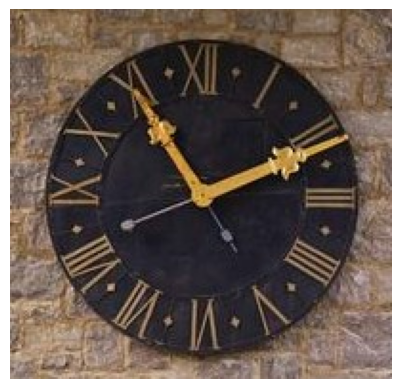

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ruta de la imagen
imagen_path = "reloj_classification.jpg"

# Cargar la imagen
imagen = mpimg.imread(imagen_path)

# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off')
plt.show()


Clasificar la imagen

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np

# Cargar el modelo preentrenado EfficientNetB0
model = EfficientNetB0(weights='imagenet')

def classify_image(img_path):
    # Cargar y preparar la imagen
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Tamaño de entrada para EfficientNetB0

    # Convertir la imagen a un array y procesarla
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Realizar la predicción con el modelo
    predictions = model.predict(img_array)

    # Decodificar y retornar las predicciones
    return decode_predictions(predictions, top=3)[0]

# Prueba con una imagen local
img_path = 'reloj_classification.jpg'
predictions = classify_image(img_path)

print('\n')

# Mostrar las predicciones
for i, (imagenet_id, label, score) in enumerate(predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1/1 [==============================] - 2s 2s/step


1: wall_clock (0.69)
2: analog_clock (0.18)
3: barometer (0.00)



##Localización de objetos
En la localización de objetos, el objetivo es identificar la ubicación precisa de uno o varios objetos dentro de una imagen. Esta tarea implica detectar la presencia de objetos específicos y, en algunos casos, delimitar sus ubicaciones mediante la definición de cuadros delimitadores (bounding boxes) alrededor de ellos. La localización de objetos es útil cuando se necesita saber no solo qué objetos están presentes en una imagen, sino también dónde están ubicados exactamente.


### Ejemplo

Mostrar imagen a analizar

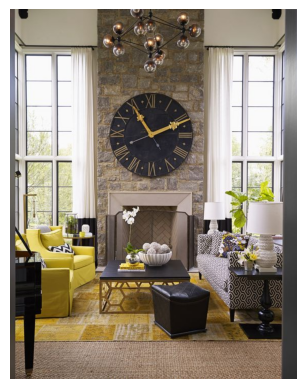

In [13]:
# Ruta de la imagen
imagen_path = "reloj_detection.jpg"

# Cargar la imagen
imagen = mpimg.imread(imagen_path)

# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off')
plt.show()

Detectar objetos


In [10]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 11.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man


0: 640x512 2 couchs, 2 potted plants, 1 clock, 1 vase, 209.1ms
Speed: 5.7ms preprocess, 209.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


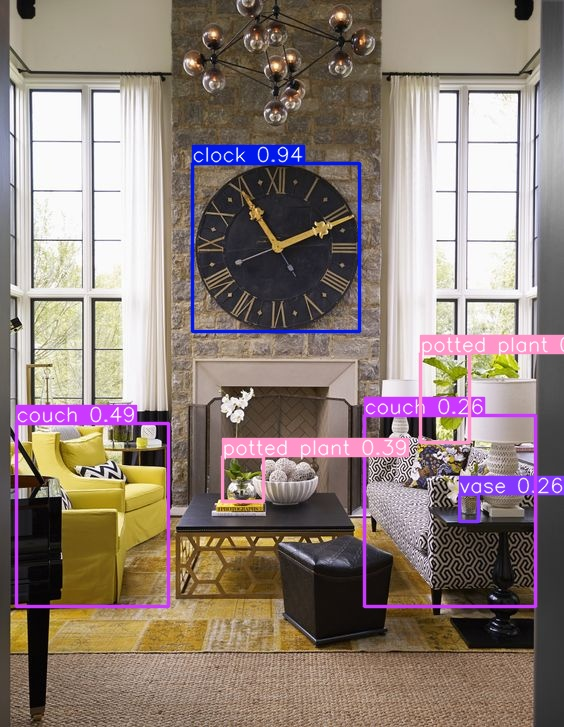

In [12]:
# Importamos las librerías a utilizar
import cv2
from ultralytics import YOLO
from IPython.display import Image

# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n')  # This will automatically download the model weights

# Perform inference
source_img = cv2.imread('reloj_detection.jpg')
results = model(source_img)

# Visualize the results on the frame
annotated_frame = results[0].plot()

# Guardamos el resultado en JPG
cv2.imwrite('clock_results.jpg', annotated_frame)

# Mostramos el resultado en Colab
Image('clock_results.jpg')